In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi
import time

In [19]:
M_space = np.linspace(0, 2*pi, 1000)
a = 0.5
e = 0.2
a2 = 1.0
e2 =0.1
#x_prime = -a*e*cos(M_space)
#y_prime = 2*a*e*sin(M_space)

<IPython.core.display.Javascript object>


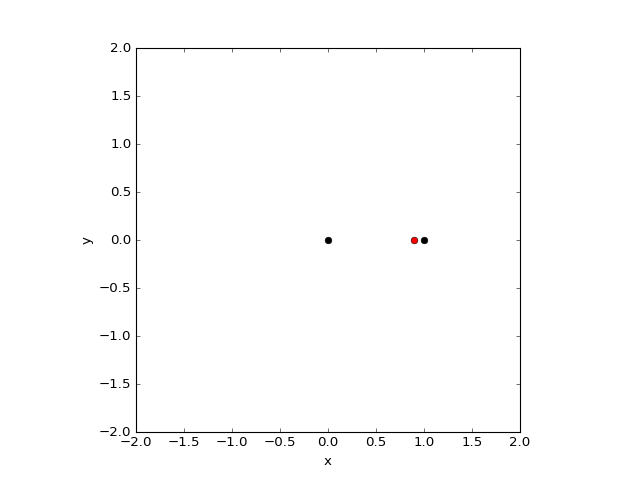

In [20]:
%matplotlib notebook
fig,ax = plt.subplots(1,1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.plot([0],[0],'ko')
plt.show()
first = True
for M_frame in M_space:
    f_frame = 2*e2*sin(M_frame) + M_frame
    r_frame = (a2*(1+e2**2))/(1+e2*cos(f_frame))
    if first:
        ax.plot(np.cos(M_frame), np.sin(M_frame), 'ko')
        ax.plot(np.cos(M_frame) -a*e*np.cos(M_frame), np.sin(M_frame) + 2*a*e*np.sin(M_frame), 'ko', color = 'red')
        ax.plot(r_frame*np.cos(f_frame), r_frame*np.sin(f_frame))
        first = False
    else:
        ax.lines[1].set_xdata(np.cos(M_frame))
        ax.lines[1].set_ydata(np.sin(M_frame))
        ax.lines[2].set_xdata(np.cos(M_frame) - a*e*np.cos(M_frame))
        ax.lines[2].set_ydata(np.sin(M_frame) + 2*a*e*np.sin(M_frame))
        ax.lines[3].set_xdata(r_frame*np.cos(f_frame))
        ax.lines[3].set_ydata(r_frame*np.sin(f_frame))
    fig.canvas.draw()
    time.sleep(0.1)
